In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# keep in mind that cifar10 is an interesting tensorflow data structure/array
# 60,000 training images and 10,000 test images. 32 pixels x 32 pixels (blurry) pictures, colored i.e. RGD

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# i.e. airplane = label 0, automobile = label 1, .... truck = 

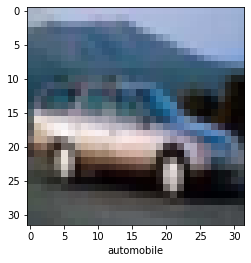

In [3]:
# Let's look at one image

IMG_INDEX = 4 # change this to look up other images

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [4]:
## CNN Architecture ##
# A common architecture for a CNN is a stack of Conv2D and MaxPoling2D layers followed by a few densely connected layers.
# The idea is that these sequential layers detect features in the image, with increasing levels of search -> consolidation
# e.g. find lines and edges -> consolidate/reduce dimensionality -> find curves and shapes -> consol/red. dim -> find key shapes/features

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# 32 filters
# search 3x3 batches/windows, activ_fn = relu
# feed in 32 pixels by 32 pixels by RGB
model.add(layers.MaxPooling2D((2, 2))) # 2x2 batches with stride length 2
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
# 64 filters
# search 3x3 batches/windows, activ_fn = relu
# this layer will figure out the size input data, so it does not need it to be defined
model.add(layers.MaxPooling2D((2, 2))) # 2x2 batches with stride length 2 
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# 64 filters
# search 3x3 batches/windows, activ_fn = relu
# this layer will figure out the size input data, so it does not need it to be defined

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [6]:
# conv2d -> 30, 30, 32 - we get 2 pixels less because of no padding
# 30 -> 15 (halved) -> 13 (minus 2) -> 6 (halved) -> 4 (minus 2) dimensionality

In [7]:
# Add the dense layers after the convolution layers
model.add(layers.Flatten()) # flattening layer - row major - 1 dim array
model.add(layers.Dense(64, activation='relu')) # dense layer
model.add(layers.Dense(10)) # dense layer, 10 classifications

In [8]:
model.summary()
# 1024 = 4 x 4 x 64

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [9]:
## Training ##
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 38s 750us/sample - loss: 1.5422 - accuracy: 0.4375 - val_loss: 1.3361 - val_accuracy: 0.5124
Epoch 2/10
50000/50000 [==============================] - 35s 698us/sample - loss: 1.1673 - accuracy: 0.5882 - val_loss: 1.1330 - val_accuracy: 0.6007
Epoch 3/10
50000/50000 [==============================] - 35s 696us/sample - loss: 1.0146 - accuracy: 0.6438 - val_loss: 1.0198 - val_accuracy: 0.6361
Epoch 4/10
50000/50000 [==============================] - 35s 690us/sample - loss: 0.9166 - accuracy: 0.6785 - val_loss: 0.9552 - val_accuracy: 0.6708
Epoch 5/10
50000/50000 [==============================] - 35s 691us/sample - loss: 0.8523 - accuracy: 0.7015 - val_loss: 0.9307 - val_accuracy: 0.6790
Epoch 6/10
50000/50000 [==============================] - 35s 691us/sample - loss: 0.7924 - accuracy: 0.7203 - val_loss: 0.8996 - val_accuracy: 0.6965
Epoch 7/10
50000/50000 [====================

In [10]:
# regarding which optimizer, loss and metrics (hyperparameters), look up the documentation!

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc) 
# 0.7069 - this should be the same as the accuracy from the last epoch
# as we have fed the test data to the training/model fit 

10000/10000 - 2s - loss: 0.8965 - accuracy: 0.6988
0.6988


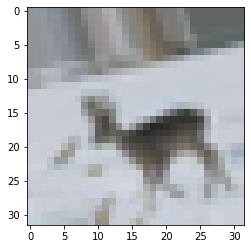

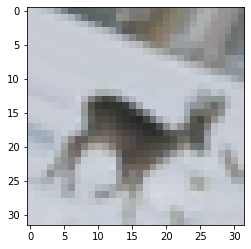

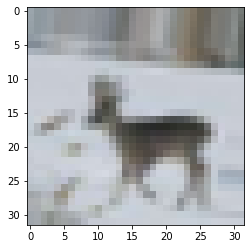

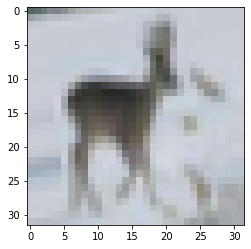

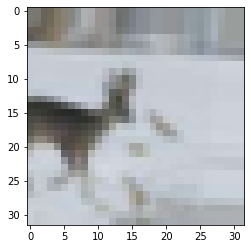

In [11]:
## Data Augmentation and Working With Small Datasets ##
# In actuality, in the situation where you don't have millions of images, it is difficult to train a CNN from ...
# ... scratch that is able to perform very well. Yes, you could use a pre-trained CNN which has already been passed ...
# ... millions of images by Google or some other tech company.
# To avoid overfitting to the small dataset, we will use certain techniques to randomly transform our dataset images ...
# ... such that our model can generalize better. These transformations include: compression, rotation, color changes, stretches etc.

# Fortunately keras can help us do this ->

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# creates an image data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# example, pick an image to transform
test_img = train_images[20] # 20 is a random index chosen
img = image.img_to_array(test_img)  # convert image to numpy arry
img = img.reshape((1,) + img.shape)  # reshape image as 1 row

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()